# A step-by-step complete beginner’s guide to building your first Neural Network in a couple lines of code like a Deep Learning pro!
(https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-data/housepricedata.csv


### Exploring and Processing the Data
- Read in the CSV (comma separated values) file and convert them to arrays. Arrays are a data format that our algorithm can process.
- Split our dataset into the input features (which we call x) and the label (which we call y).
- Scale the data (we call this normalization) so that the input features have similar orders of magnitude.
- Split our dataset into the training set, the validation set and the test set. If you need a refresher on why we need these three datasets

In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/house-price-data/housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
# convert it into arrays for our machine to process
dataset = df.values

In [6]:
# store the values of df (by accessing df.values) into the variable ‘dataset’
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
# split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y
X = dataset[:,0:10]

In [8]:
# assign the last column of our array to Y
Y = dataset[:,10]

In [9]:
from sklearn import preprocessing
# which scales the dataset so that all the input features lie between 0 and 1 inclusive
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
# hat your val_and_test size will be 30% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
#  Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In summary, we now have a total of six variables for our datasets we will use:
- X_train (10 input features, 70% of full dataset)
- X_val (10 input features, 15% of full dataset)
- X_test (10 input features, 15% of full dataset)
- Y_train (1 label, 70% of full dataset)
- Y_val (1 label, 15% of full dataset)
- Y_test (1 label, 15% of full dataset)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### Building and Training our First Neural Network
1. Setting up the Architecture
    - Hidden layer 1: 32 neurons, ReLU activation
    - Hidden layer 2: 32 neurons, ReLU activation
    - Output Layer: 1 neuron, Sigmoid activation

In [15]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

2. Filling in the best numbers

In [17]:
# sgd refers to stochastic gradient descent
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

- As we are fitting the parameters to the data. 
- We have to specify what data we are training on, which is X_train and Y_train. 
- Then, we specify the size of our mini-batch and how long we want to train it for (epochs). 
- Lastly, we specify what our validation data is so that the model will tell us how we are doing on the validation data at each point. - This function will output a history, which we save under the variable hist. We’ll use this variable a little later when we get to visualization.

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 20ms/step - loss: 0.6890 - accuracy: 0.4993 - val_loss: 0.6885 - val_accuracy: 0.4795
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5042 - val_loss: 0.6839 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5288 - val_loss: 0.6796 - val_accuracy: 0.5342
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.5589 - val_loss: 0.6754 - val_accuracy: 0.5845
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6087 - val_loss: 0.6714 - val_accuracy: 0.6164
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6671 - val_loss: 0.6676 - val_accuracy: 0.6621
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.7256 - val_loss: 0.6640 - val_accuracy: 0.6712
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8877 - val_loss: 0.3687 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.8723 - val_loss: 0.3640 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3062 - accuracy: 0.8885 - val_loss: 0.3643 - val_accuracy: 0.8493
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8788 - val_loss: 0.3600 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.8708 - val_loss: 0.3569 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.8992 - val_loss: 0.3566 - val_accuracy: 0.8584
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8962 - val_loss: 0.3549 - val_accuracy: 0.8584
Epoch 

In [19]:
# index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0)
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8584


0.8584474921226501

### Visualizing Loss and Accuracy

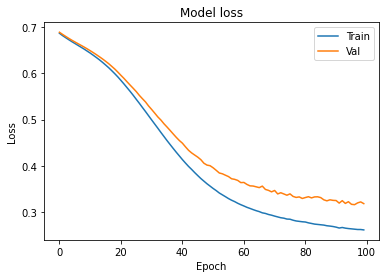

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

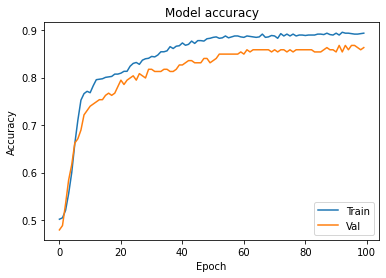

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding Regularization to our Neural Network

In [23]:
# introducing regularization to our neural network, let’s formulate with a neural network that will badly overfit on our training set
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [24]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 34ms/step - loss: 0.5072 - accuracy: 0.7379 - val_loss: 0.3906 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 0.3542 - accuracy: 0.8490 - val_loss: 0.3906 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 26ms/step - loss: 0.3760 - accuracy: 0.8503 - val_loss: 0.3466 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 26ms/step - loss: 0.2701 - accuracy: 0.8964 - val_loss: 0.3009 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 26ms/step - loss: 0.2376 - accuracy: 0.8928 - val_loss: 0.2959 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2308 - accuracy: 0.9106 - val_loss: 0.2532 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2206 - accuracy: 0.9150 - val_loss: 0.2857 - val_accuracy: 0.8676
Epoch 

32/32 [==============================] - 1s 28ms/step - loss: 0.1785 - accuracy: 0.9241 - val_loss: 0.5008 - val_accuracy: 0.8493
Epoch 59/100
32/32 [==============================] - 1s 26ms/step - loss: 0.1685 - accuracy: 0.9259 - val_loss: 0.3348 - val_accuracy: 0.8539
Epoch 60/100
32/32 [==============================] - 1s 26ms/step - loss: 0.1251 - accuracy: 0.9534 - val_loss: 0.2657 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 28ms/step - loss: 0.1310 - accuracy: 0.9451 - val_loss: 0.2608 - val_accuracy: 0.8995
Epoch 62/100
32/32 [==============================] - 1s 27ms/step - loss: 0.1673 - accuracy: 0.9328 - val_loss: 0.2882 - val_accuracy: 0.8676
Epoch 63/100
32/32 [==============================] - 1s 27ms/step - loss: 0.1295 - accuracy: 0.9414 - val_loss: 0.2813 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 1s 27ms/step - loss: 0.1379 - accuracy: 0.9353 - val_loss: 0.3500 - val_accuracy: 0.8630
Epoch 65/100

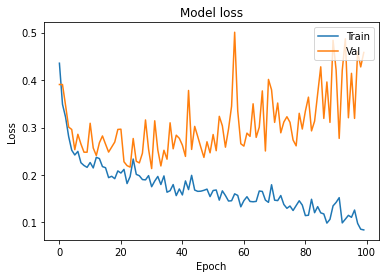

In [26]:
# clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing (past the inflexion point of Epoch 20
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

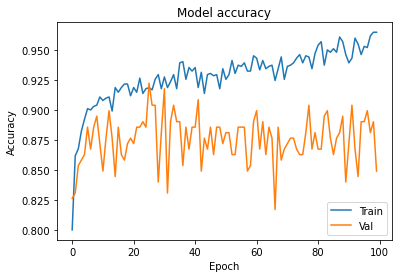

In [28]:
# clearer divergence between train and validation accuracy as well
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
# incorporate L2 regularization and dropout here. The reason we don’t add early stopping here is because after we’ve used the first two strategies, the validation loss doesn’t take the U-shape we see above and so early stopping will not be as effective
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

#### Differences between Model 3 and Model 2:
- Difference 1: To add L2 regularization, notice that we’ve added a bit of extra code in each of our dense layers
    - his tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function
- Difference 2: To add Dropout, we added a new layer like this
    - means that the neurons in the previous layer has a probability of 0.3 in dropping out during training

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 40ms/step - loss: 21.1120 - accuracy: 0.5648 - val_loss: 3.9214 - val_accuracy: 0.7215
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 2.4695 - accuracy: 0.8318 - val_loss: 0.6962 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.6307 - accuracy: 0.8518 - val_loss: 0.5440 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.5081 - accuracy: 0.8783 - val_loss: 0.5793 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4795 - accuracy: 0.8803 - val_loss: 0.5167 - val_accuracy: 0.8402
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4725 - accuracy: 0.8859 - val_loss: 0.5200 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4652 - accuracy: 0.8845 - val_loss: 0.4821 - val_accuracy: 0.8630
Epoch

32/32 [==============================] - 1s 32ms/step - loss: 0.4385 - accuracy: 0.8924 - val_loss: 0.4452 - val_accuracy: 0.8539
Epoch 59/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4281 - accuracy: 0.8970 - val_loss: 0.4378 - val_accuracy: 0.8630
Epoch 60/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4034 - accuracy: 0.8963 - val_loss: 0.4858 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4101 - accuracy: 0.9065 - val_loss: 0.4370 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4172 - accuracy: 0.8901 - val_loss: 0.4641 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3955 - accuracy: 0.9058 - val_loss: 0.4472 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4158 - accuracy: 0.9085 - val_loss: 0.5203 - val_accuracy: 0.8311
Epoch 65/100

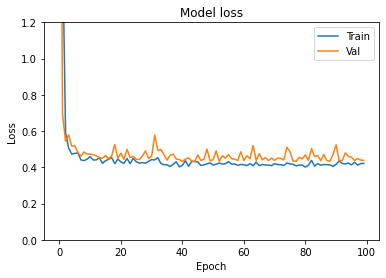

In [32]:
# see that the validation loss much more closely matches our training loss
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

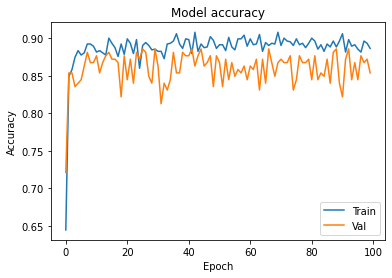

In [33]:
# Compared to our model in Model 2, we’ve reduced overfitting substantially
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Model 4 uses the mean squared error loss function

In [36]:
model_4 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [43]:
import tensorflow as tf
model_4.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [44]:
hist_4 = model_4.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 37ms/step - loss: 4.5640 - val_loss: 0.3172
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2813 - val_loss: 0.2323
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2348 - val_loss: 0.2338
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2130 - val_loss: 0.2663
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2269 - val_loss: 0.2292
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2120 - val_loss: 0.2170
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2114 - val_loss: 0.2204
Epoch 8/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2213 - val_loss: 0.2229
Epoch 9/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2084 - val_loss: 0.2181
Epoch 10/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2108 - val_loss: 0.2482

32/32 [==============================] - 1s 33ms/step - loss: 0.2064 - val_loss: 0.2201
Epoch 83/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2000 - val_loss: 0.2116
Epoch 84/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2045 - val_loss: 0.2155
Epoch 85/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2107 - val_loss: 0.2134
Epoch 86/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2100 - val_loss: 0.2448
Epoch 87/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2120 - val_loss: 0.2139
Epoch 88/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2168 - val_loss: 0.2140
Epoch 89/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2094 - val_loss: 0.2145
Epoch 90/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2134 - val_loss: 0.2210
Epoch 91/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2003 - val_loss: 0.2168
Epo

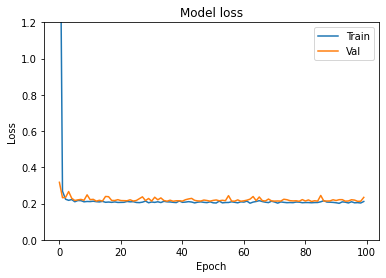

In [45]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()